<div style="float: right; width: 70%; height: 150px;">
  <div style="position: relative; top: 20%;padding-right:20%;">
  <div style="font-size:280%;font-weight: bold;padding-top: 20px;"> VPREMOON</div>
  <div style="font-size:180%;font-weight: bold;padding-top: 20px;color: rgba(0 , 0 , 0 , 0.5);"> Moon model</div>
  </div>
</div>

This script will use VPREMOON and the obspy taup tool for predicting travel times in lunar seismology.

In [93]:
from __future__ import print_function
import os,sys

# for fixed plots
%matplotlib inline
# for interactive plots
#%matplotlib notebook

import matplotlib as mpl
print("matplotlib version: ",mpl.__version__)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['lines.linewidth'] = 0.5

matplotlib version:  3.2.1


uses obspy<br>
http://docs.obspy.org<br>
a python framework for seismology

In [94]:
import obspy
print("obspy version: ",obspy.__version__)

obspy version:  1.1.1


In [95]:
from obspy.taup import TauPyModel
from obspy.taup import taup_create

print("creating model VPREMOON")

# creates taup model for VPREMOON file
taup_create.build_taup_model('./vpremoon.nd',output_folder='./',verbose=True)


creating model VPREMOON
Building obspy.taup model for './vpremoon.nd' ...


In [96]:
# read in model
flattening = 0.0  # 1.0/901.0

model = TauPyModel(model="./vpremoon.npz",verbose=True,planet_flattening=flattening)

# check
model.model.validate()

radius_km = model.model.radius_of_planet
print("model radius:",radius_km,"(km)")


model radius: 1737.1 (km)



## Event

Large meteoroid impact: 
    May 13, 1972. (day 134, 1972)
    impact time 08:46:42.5 +/- 1s

    ~145km north of Apollo 14 station 

    Apollo Preliminary Science Report, chapter 9, Passive seismic experiment, Table 9-1:

    arrival times: 
              P-wave              S-wave                 traveltimes estimates
        S12 - 08:47:24.6                                 T_p =  42.1 s
        S14 - 08:47:12.4                                 T_p =  29.9 s
        S15 - 08:48:54.0                                 T_p = 131.5 s
        S16 - 08:49:00.8          08:51:00.0 (?)         T_p = 138.3 s     T_s = 257.5 s

event:
  lat/lon = 1.1 / -16.9
  depth   =  0.0 (km)

station S12: 
  lat/lon = -3.01084 / -23.42456
  epicentral distance =  7.709653861720224 (degree)

  P:  P phase arrival at 42.709 seconds
  S:  S phase arrival at 74.431 seconds



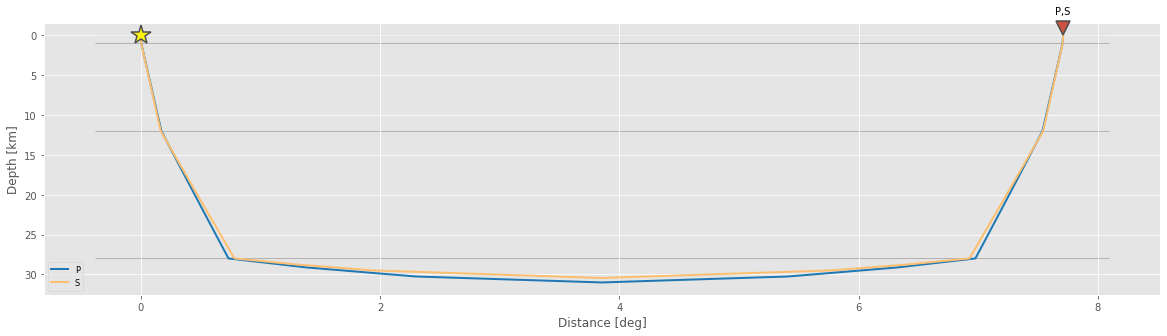

station S14: 
  lat/lon = -3.6445 / -17.47753
  epicentral distance =  4.779483854899613 (degree)

  P:  P phase arrival at 31.131 seconds
  S:  S phase arrival at 54.309 seconds



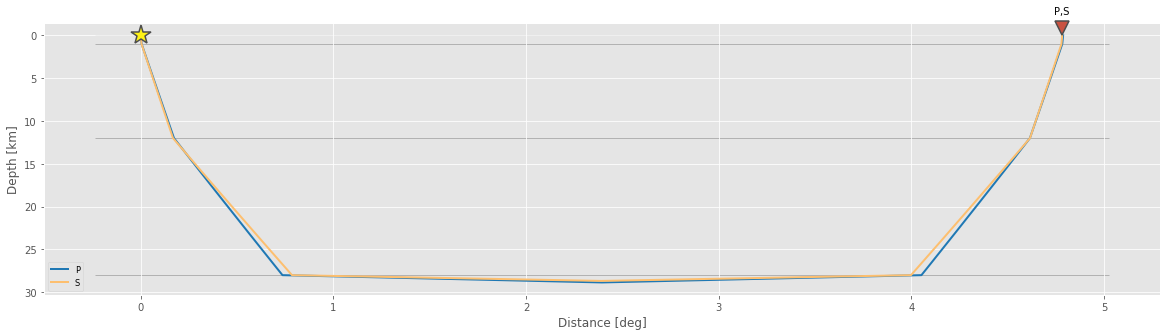

station S15: 
  lat/lon = 26.13407 / 3.62981
  epicentral distance =  31.89155192527821 (degree)

  P:  P phase arrival at 136.418 seconds
  S:  S phase arrival at 237.618 seconds



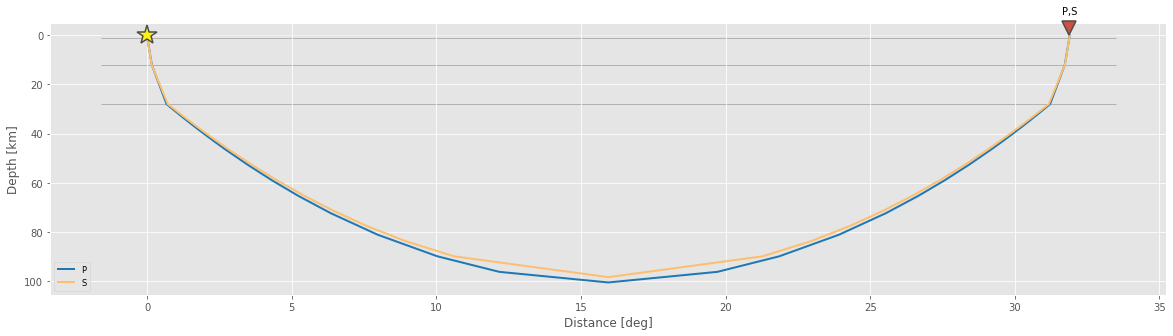

station S16: 
  lat/lon = -8.97577 / 15.49649
  epicentral distance =  33.81155850542642 (degree)

  P:  P phase arrival at 143.607 seconds
  S:  S phase arrival at 250.157 seconds



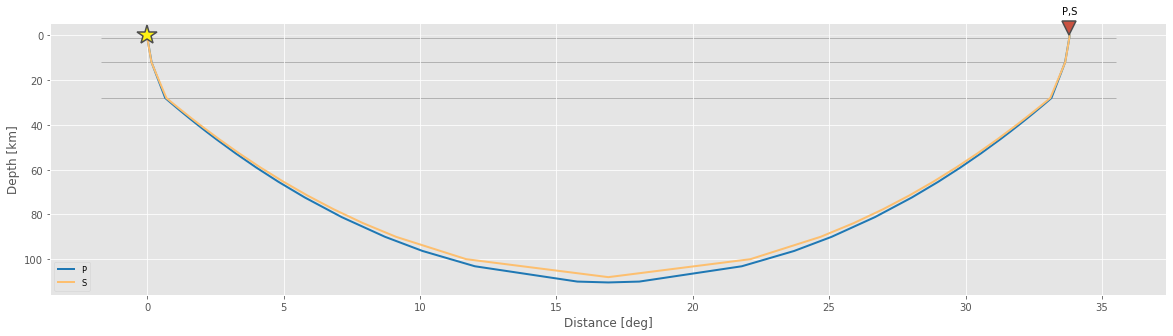

In [97]:
## epicentral distance

# event lat/lon
# meteoroid impact from May 13, 1972. (day 134, 1972) impact time 08:46:42.5 +/- 1s
# at degree (1.1 N, 16.9 W) +/- 0.2 degree 
event_lat = 1.1
event_lon = -16.9
event_dep_km = 0.0  # event depth in km

print("event:")
print("  lat/lon = {} / {}".format(event_lat,event_lon))
print("  depth   = ",event_dep_km,"(km)")
print("")

# Apollo missions stations
S12 = { 'name': 'S12', 'lat': -3.01084, 'lon': -23.42456 }    # Apollo 12 seismometer
S14 = { 'name': 'S14', 'lat': -3.64450, 'lon': -17.47753 }    # Apollo 14 seismometer
S15 = { 'name': 'S15', 'lat': 26.13407, 'lon': 3.62981 }      # Apollo 15 seismometer
S16 = { 'name': 'S16', 'lat': -8.97577, 'lon': 15.49649 }     # Apollo 16 seismometer
stations = [ S12, S14, S15, S16 ]

# epicentral distance (Haversine formula)
def get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon):
    from math import pi,sin,cos,asin,sqrt
    # converts to radians
    lat1_radians = event_lat * pi/180.0
    lon1_radians = event_lon * pi/180.0
    lat2_radians = sta_lat * pi/180.0
    lon2_radians = sta_lon * pi/180.0

    mid_lat = (lat1_radians - lat2_radians)/2.0
    mid_lon = (lon1_radians - lon2_radians)/2.0

    tmp = sqrt( pow(sin(mid_lat),2) + cos(lat1_radians)*cos(lat2_radians)*pow(sin(mid_lon),2) )

    distance_radians = 2.0 * asin(tmp)
    dist = distance_radians * 180.0/pi
    
    return dist

# show epicentral distances and main arrival times
for station in stations:    
    sta_lat = station['lat']
    sta_lon = station['lon']
    dist = get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon)
    
    print("station {}: ".format(station['name']))
    print("  lat/lon = {} / {}".format(sta_lat,sta_lon))
    print("  epicentral distance = ",dist,"(degree)")
    print("")

    # P, S arrival times (can have multiple P, S arrivals)
    arrivals_P = model.get_travel_times(source_depth_in_km=event_dep_km,
                                        distance_in_degree=dist, 
                                        phase_list=["ttall"])  # using 'ttall' in case Pn would be first, instead of P

    arrivals_S = model.get_travel_times(source_depth_in_km=event_dep_km,
                                        distance_in_degree=dist, 
                                        phase_list=["S"])
    
    # traveltimes for first arrivals    
    print("  P: ",arrivals_P[0])
    print("  S: ",arrivals_S[0])
    print("")
    
    # plot rays for first arrivals
    arrivals_P = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["ttall"])
    arrivals_S = model.get_ray_paths(source_depth_in_km=event_dep_km, distance_in_degree=dist, phase_list=["S"])
    
    arrivals = obspy.taup.tau.Arrivals([],model=model.model)
    arrivals.append(arrivals_P[0])
    arrivals.append(arrivals_S[0])

    ax = arrivals.plot_rays(plot_type="cartesian",label_arrivals=True,legend=True)
    

In [98]:
## arrival times
print("all arrival times for S16:")
      
# takes Apollo station S16
station = S16
sta_lat = station['lat']
sta_lon = station['lon']

# station epicentral distance in degree
dist = get_epicentral_distance(event_lat,event_lon,sta_lat,sta_lon)

print("  source depth: {} km, distance: {}°".format(event_dep_km,dist))

#phases = ["P","PP","PPP","PPS","p","pPcP","PKIKP","PKJKP","S","SP","SS","SSS","pP","sP","ScS","SKKS"]
phases = ["ttall"]

arrivals = model.get_travel_times(source_depth_in_km=event_dep_km,
                                  distance_in_degree=dist, 
                                  phase_list=phases)

print("  all possible arrivals: ",arrivals) 

all arrival times for S16:
  source depth: 0.0 km, distance: 33.81155850542642°
  all possible arrivals:  19 arrivals
	P phase arrival at 143.607 seconds
	PP phase arrival at 157.695 seconds
	S phase arrival at 250.157 seconds
	SP phase arrival at 257.084 seconds
	PS phase arrival at 257.084 seconds
	SS phase arrival at 274.658 seconds
	PcP phase arrival at 353.885 seconds
	PKiKP phase arrival at 420.791 seconds
	PcS phase arrival at 487.284 seconds
	ScP phase arrival at 487.284 seconds
	SKiKP phase arrival at 553.484 seconds
	ScS phase arrival at 621.824 seconds
	PKIKKIKS phase arrival at 831.907 seconds
	SKIKKIKP phase arrival at 831.907 seconds
	PKIKKIKS phase arrival at 833.477 seconds
	SKIKKIKP phase arrival at 833.477 seconds
	SKIKKIKS phase arrival at 966.308 seconds
	PKIKPPKIKP phase arrival at 1065.223 seconds
	SKSSKS phase arrival at 1653.159 seconds


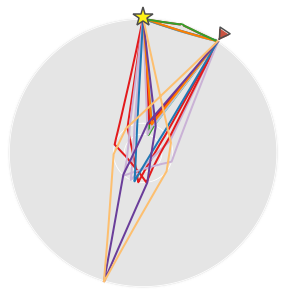

In [99]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km, 
                               distance_in_degree=dist, 
                               phase_list=phases)
ax = arrivals.plot_rays()

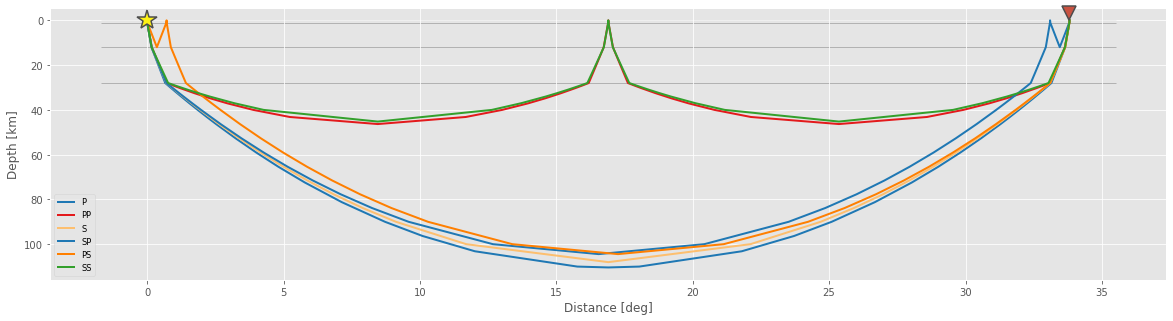

In [100]:
arrivals = model.get_ray_paths(source_depth_in_km=event_dep_km,
                               distance_in_degree=dist,
                               phase_list=["P","Pn","PP","S","Sn","SP","PS","SS"])  # 
ax = arrivals.plot_rays(plot_type="cartesian", legend=True)

done. 